In [1]:
## I will be exploring CDBG Activity Data from HUD Data Library

In [3]:
import pandas as pd

In [4]:
import geopandas as gpd

In [40]:
data = pd.read_csv('Community_Development_Block_Grant_Activity.csv')

In [85]:
### data is now imported and I can rename it 
cdbg = pd.DataFrame(data)

In [86]:
### What type of data is it
type(cdbg)

pandas.core.frame.DataFrame

In [87]:
###Boom! Now I have the data uploaded and we can start exploring
###I'll start with pulling a sample
cdbg.sample(5)

,X,Y,OBJECTID,ID,GRANTEE,GRANTEE_TYPE,GRANTEE_ID,IDIS_ACTV_ID,ADDRESS,CITY,...,ZIP,LAT,LON,GROUPING,NAME,ALIAS,ACTV_FUNDING_AMT,COMPLETED_DT,ID_CHAR,COMPLETED_DT_Converted
1639,-110.986580,32.228836,209030,900000000666621,PIMA COUNTY,61,12971,1526,525 N Bonita Ave,Tucson,...,85745,32.228836,-110.986580,Public Improvements,Neighborhood Facilities,NaN,40000.00,10/31/2018,900000000666621,NaN
1785,-112.195129,33.532300,209502,997901573,GLENDALE,51,9979,1573,"6534 N 63rd Ave, CITY-WIDE ...",Glendale,...,85301,33.532300,-112.195129,Public Services,Child Care Services,NaN,14990.00,08/20/2008,997901573,NaN
517,-109.281104,34.132670,201122,900000000239198,ARIZONA,21,136,5038,418 E Main St,Springerville,...,85938,34.132670,-109.281104,Public Improvements,Neighborhood Facilities,NaN,92850.82,04/30/2014,900000000239198,NaN
1746,-112.195129,33.532300,209420,997901438,GLENDALE,51,9979,1438,"6534 N 63rd Ave, 6625 N. 56TH AVE, 4932 W. MYR...",Glendale,...,85301,33.532300,-112.195129,Public Services,Health Services,NaN,10000.00,09/15/2006,997901438,NaN
570,-114.635863,32.722617,201236,900000000444028,YUMA,51,16269,480,300 S 13th Ave,Yuma,...,85364,32.722617,-114.635863,Public Services,"Other Public Services Not Listed in 05A-05Y, 03T",NaN,5000.00,06/30/2015,900000000444028,NaN


In [88]:
###As these are specific projects, we are able to see where they are located but also specific classifications
###I am going to pull some info on the larger data set
cdbg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   X                       3979 non-null   float64
 1   Y                       3979 non-null   float64
 2   OBJECTID                3979 non-null   int64  
 3   ID                      3979 non-null   int64  
 4   GRANTEE                 3979 non-null   object 
 5   GRANTEE_TYPE            3979 non-null   int64  
 6   GRANTEE_ID              3979 non-null   int64  
 7   IDIS_ACTV_ID            3979 non-null   int64  
 8   ADDRESS                 3979 non-null   object 
 9   CITY                    3979 non-null   object 
 10  STATE                   3979 non-null   object 
 11  ZIP                     3979 non-null   int64  
 12  LAT                     3979 non-null   float64
 13  LON                     3979 non-null   float64
 14  GROUPING                3979 non-null   

In [89]:
###This information shows us the specific column names but also alot of other specifics such as the Grantee
###Even though I have the columns, I will still pull that information
cdbg.columns.to_list()

['X',
 'Y',
 'OBJECTID',
 'ID',
 'GRANTEE',
 'GRANTEE_TYPE',
 'GRANTEE_ID',
 'IDIS_ACTV_ID',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'LAT',
 'LON',
 'GROUPING',
 'NAME',
 'ALIAS',
 'ACTV_FUNDING_AMT',
 'COMPLETED_DT',
 'ID_CHAR',
 'COMPLETED_DT_Converted']

In [90]:
###I am going to pull counts for the local grantee jurisdictions
cdbg['GRANTEE'].value_counts()

PHOENIX            1021
TUCSON              748
ARIZONA             400
PIMA COUNTY         391
GLENDALE            264
CHANDLER            213
MESA                179
SCOTTSDALE          137
TEMPE               122
YUMA                121
PEORIA              116
MARICOPA COUNTY      96
FLAGSTAFF            40
GILBERT              39
SURPRISE             38
PRESCOTT             25
AVONDALE             14
CASA GRANDE           6
SIERRA VISTA          6
DOUGLAS               3
Name: GRANTEE, dtype: int64

In [91]:
###Cool! Now I'll pull some other information for counts. I'll pull counts for grantee ID.
cdbg['GRANTEE_ID'].value_counts()

10659              1021
13090               748
136                 400
12971               391
9979                264
9622                213
10438               179
13022               137
10880               122
16269               121
10642               116
10404                96
9928                 40
106879               39
401863               38
390575               25
401285               14
13413                 6
900000000004879       6
9690                  3
Name: GRANTEE_ID, dtype: int64

In [92]:
###These designations are used to capture and track CDBG expenditures 10659 is the ID for the city of Phoenix, AZ 
###I am going to pull the information for the specific types of project 
cdbg['GROUPING'].value_counts()

Public Services         2036
Public Improvements     1488
Economic Development     205
Housing                  176
Acquisition               73
Other                      1
Name: GROUPING, dtype: int64

In [93]:
### I'll show a dataframe
cdbg[['GRANTEE','GROUPING','NAME','ACTV_FUNDING_AMT']]

,GRANTEE,GROUPING,NAME,ACTV_FUNDING_AMT
0,GLENDALE,Housing,Public Housing Modernization,165980.15
1,GLENDALE,Public Improvements,Other Public Improvements Not Listed in 03A-03S,85303.71
2,PIMA COUNTY,Public Improvements,Other Public Improvements Not Listed in 03A-03S,86910.76
3,PIMA COUNTY,Public Services,Youth Services,10000.00
4,PIMA COUNTY,Public Services,Youth Services,14980.71
...,...,...,...,...
3974,ARIZONA,Economic Development,Rehabilitation: Publicly or Privately Owned Co...,116833.00
3975,ARIZONA,Public Improvements,Other Public Improvements Not Listed in 03A-03S,9332.28
3976,TUCSON,Public Services,Child Care Services,30000.00
3977,TUCSON,Public Improvements,Other Public Improvements Not Listed in 03A-03S,205688.00


In [95]:
### I'll pull out a list of desire columns
columns = ['GRANTEE','GROUPING','ACTV_FUNDING_AMT']

In [94]:
### Here is a sample of 10 projects taking into account the desired columns
cdbg[columns].sample(10)

,GRANTEE,GROUPING,ACTV_FUNDING_AMT
3903,PIMA COUNTY,Public Services,63000.00
18,PIMA COUNTY,Public Improvements,20185.98
1933,MESA,Public Improvements,2205000.00
968,TUCSON,Public Services,32750.00
2554,CHANDLER,Public Services,10000.00
2674,TEMPE,Public Services,80000.00
1194,PHOENIX,Public Improvements,54900.00
3475,PHOENIX,Public Services,35000.00
2702,CHANDLER,Public Services,5000.00
966,TUCSON,Public Improvements,150000.00


In [96]:
###I'll go ahead and create a copy of the heading and mark as a new variable
cdbg_trim = cdbg[columns].copy()

In [97]:
###This is just a check on the variable
cdbg_trim

,GRANTEE,GROUPING,ACTV_FUNDING_AMT
0,GLENDALE,Housing,165980.15
1,GLENDALE,Public Improvements,85303.71
2,PIMA COUNTY,Public Improvements,86910.76
3,PIMA COUNTY,Public Services,10000.00
4,PIMA COUNTY,Public Services,14980.71
...,...,...,...
3974,ARIZONA,Economic Development,116833.00
3975,ARIZONA,Public Improvements,9332.28
3976,TUCSON,Public Services,30000.00
3977,TUCSON,Public Improvements,205688.00


In [98]:
###Now I am curious regarding the breakdown of the grouping for CDBG projects
###I am going to import the tools to create graphs to visualize this data.  I am going to focus on housing
import matplotlib.pyplot as plt

In [99]:
### I'll create a new variable tracking housing
cdbg_housing = cdbg[cdbg['GROUPING'] == "Housing"]

In [100]:
cdbg_housing

,X,Y,OBJECTID,ID,GRANTEE,GRANTEE_TYPE,GRANTEE_ID,IDIS_ACTV_ID,ADDRESS,CITY,...,ZIP,LAT,LON,GROUPING,NAME,ALIAS,ACTV_FUNDING_AMT,COMPLETED_DT,ID_CHAR,COMPLETED_DT_Converted
0,-112.190757,33.536986,200059,900000000229512,GLENDALE,51,9979,1771,6842 N 61st Ave,Glendale,...,85301,33.536986,-112.190757,Housing,Public Housing Modernization,NaN,165980.15,10/02/2015,900000000229512,NaN
29,-110.982110,32.186142,200171,1309001742,TUCSON,90,13090,1742,"3314 S 16th Ave, ...",Tucson,...,85713,32.186142,-110.982110,Housing,Rehabilitation: Multi-Unit Residential,NaN,16910.49,06/25/2004,1309001742,NaN
59,-110.968256,32.202638,200205,900000000136256,PIMA COUNTY,61,12971,1073,1601 S 6th Ave,Tucson,...,85713,32.202638,-110.968256,Housing,Code Enforcement,NaN,34499.76,09/30/2013,900000000136256,NaN
98,-110.982110,32.186142,200320,1309002294,TUCSON,90,13090,2294,"3314 S 16th Ave, ...",Tucson,...,85713,32.186142,-110.982110,Housing,Rehabilitation: Multi-Unit Residential,NaN,30000.00,08/14/2006,1309002294,NaN
120,-111.003183,32.276058,200342,1309002267,TUCSON,90,13090,2267,3740 N Romero Rd,Tucson,...,85705,32.276058,-111.003183,Housing,Code Enforcement,NaN,100000.00,03/06/2006,1309002267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,-112.077108,33.448255,328979,900000000572286,PHOENIX,51,10659,4166,200 W Washington St,Phoenix,...,85003,33.448255,-112.077108,Housing,Rehabilitation: Multi-Unit Residential,NaN,219756.00,03/07/2018,900000000572286,NaN
3782,-112.069399,33.460717,328982,900000000539230,PHOENIX,51,10659,4073,1125 N 3rd St,Phoenix,...,85004,33.460717,-112.069399,Housing,Public Housing Modernization,NaN,165967.00,06/30/2016,900000000539230,NaN
3870,-111.795026,33.423840,333114,900000000332070,MESA,51,10438,624,407 N Williams Apt 10,Mesa,...,85203,33.423840,-111.795026,Housing,Rehabilitation: Multi-Unit Residential,NaN,57378.81,01/21/2015,900000000332070,NaN
3954,-114.620852,32.722150,335969,900000000221995,YUMA,51,16269,423,1 City Plz,Yuma,...,85364,32.722150,-114.620852,Housing,Code Enforcement,NaN,60584.00,06/30/2013,900000000221995,NaN


In [101]:
cdbg_housing.count()

X                         176
Y                         176
OBJECTID                  176
ID                        176
GRANTEE                   176
GRANTEE_TYPE              176
GRANTEE_ID                176
IDIS_ACTV_ID              176
ADDRESS                   176
CITY                      176
STATE                     176
ZIP                       176
LAT                       176
LON                       176
GROUPING                  176
NAME                      176
ALIAS                       0
ACTV_FUNDING_AMT          176
COMPLETED_DT              176
ID_CHAR                   176
COMPLETED_DT_Converted      0
dtype: int64

In [102]:
cdbg_housing['GRANTEE'].count()

176

In [104]:
cdbg_housing['GRANTEE'].value_counts()

PHOENIX            69
GLENDALE           25
CHANDLER           20
MESA               16
YUMA               15
TUCSON             11
ARIZONA             6
PEORIA              6
PIMA COUNTY         4
PRESCOTT            2
MARICOPA COUNTY     1
FLAGSTAFF           1
Name: GRANTEE, dtype: int64

In [105]:
cdbg_graph = cdbg_housing['GRANTEE'].value_counts()

In [108]:
cdbg_graph = cdbg_graph.reset_index()

In [109]:
cdbg_graph.columns = ['Locality','Count']

In [110]:
cdbg_graph

,Locality,Count
0,PHOENIX,69
1,GLENDALE,25
2,CHANDLER,20
3,MESA,16
4,YUMA,15
5,TUCSON,11
6,ARIZONA,6
7,PEORIA,6
8,PIMA COUNTY,4
9,PRESCOTT,2


<AxesSubplot: title={'center': 'CDBG Housing Projects in Arizona'}, xlabel='Locality'>

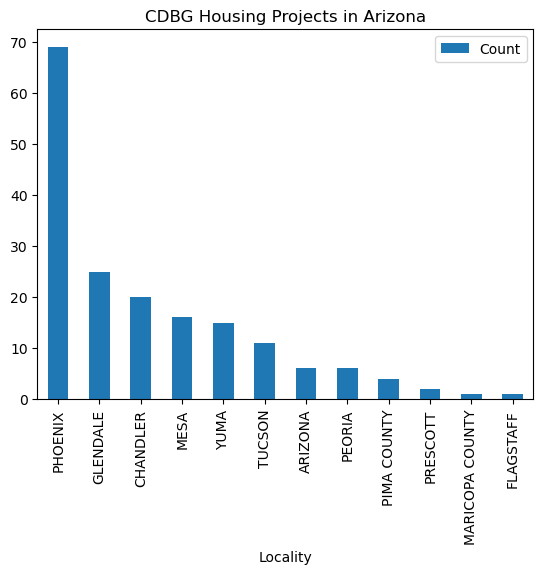

In [112]:
cdbg_graph.plot.bar(x ='Locality',y ='Count',title = 'CDBG Housing Projects in Arizona')

In [124]:
### I am going to map the specific housing points now
import folium

In [125]:
m = folium.Map()

In [128]:
### AVG latitude
latitude = cdbg_housing.LAT.mean()
latitude

33.326136818181816

In [132]:
cdbg_housing['LON']

0      -112.190757
29     -110.982110
59     -110.968256
98     -110.982110
120    -111.003183
           ...    
3779   -112.077108
3782   -112.069399
3870   -111.795026
3954   -114.620852
3955   -114.638073
Name: LON, Length: 176, dtype: float64

In [135]:
longitude = cdbg_housing['LON'].mean()
longitude

-112.18293472727274

In [137]:
# I had to work around this issue as it wasn't really coming out using the same syntax
m = folium.Map(location=[latitude,longitude])
m

In [138]:
#I am going to loop the data points
for index, row in cdbg_housing.iterrows():
    print(row.ADDRESS, row.LAT, row.LON)

6842 N 61st Ave 33.536986 -112.190757
3314 S 16th Ave,                                               32.186142 -110.98211
1601 S 6th Ave 32.202638 -110.968256
3314 S 16th Ave,                                               32.186142 -110.98211
3740 N Romero Rd 32.276058 -111.003183
735 S Stone Ave,                                               32.212724 -110.968877
216 Joy Nevin Ave 34.900872 -110.16138
1230 Willow Creek Rd 34.566565 -112.482299
1 City Plz 32.722314 -114.620867
1555 W Colorado St 32.727093 -114.638073
300 W Orchid St 32.592028 -114.712503
300 E Superstition Blvd 33.422496 -111.541539
1015 Fair St 34.553285 -112.484473
3325 N Yavapai Ct 34.591079 -112.314744
1555 W Colorado St 32.726929 -114.638073
601 S Orange Ave 32.716081 -114.623112
1 City Plz 32.72215 -114.620852
1 City Plz 32.72215 -114.620852
1070 W 1st St 32.72541 -114.632796
1 City Plz 32.72215 -114.620852
1819 S Maple Ave,                                               32.694579 -114.617967
2002 E Fort Lowell Rd

In [139]:
for index, row in cdbg_housing.iterrows():
    folium.Marker([row.LAT,row.LON],popup=row.ADDRESS,tooltip=row.ADDRESS).add_to(m)

In [140]:
m

In [141]:
### Ayoooo we mapped it

In [142]:
m.save('cdbg_housing.html')